# Chapter 5: Visual Syntax
For additional context see Chapter 5 of [The Virus of Variation](https://www.brokenquality.com/book). Questions? Email James.Lehner@gmail.com or QualityIsBroken@gmail.com.

In [15]:
# Import libraries
from matplotlib import pyplot as plt
from process_improvement import comparison_charts as cc
import numpy as np
import seaborn as sns
import pandas as pd

import warnings

# This is used to silence a known issue with seabron
warnings.filterwarnings(
    "ignore",
    message="use_inf_as_na option is deprecated",
    category=FutureWarning
)

# This is used to silence a second known issue with seaborn
warnings.filterwarnings(
    "ignore",
    message="When grouping with a length-1 list-like",
    category=FutureWarning
)

%matplotlib inline

## Get the data

The dataset used in this chapter is called:

`vienna-general-death-to-birth-rates-by-clinic.csv`

The data can be found at https://github.com/jimlehner/the-virus-of-variation/tree/main/data.

In [16]:
# Establish the dataset_url
rate_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/vienna-general-death-to-birth-rates-by-clinic.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(rate_url)

# Get data
rate_df = get_data(rate_url)

# Drop unnecessary columns
rate_df = rate_df[[#'Hospital', 
                   'Clinic', 
                   #'Employee', 
                   'Year', 
                   #'Births', 
                   #'Deaths', 
                   'Rate', 
                   #'Note'
                  ]]

# Specify 'Year' column dtype as string
rate_df['Year'] = rate_df['Year'].astype('string')

# Show dataframe
rate_df.head()

,Clinic,Year,Rate
0,1st Clinic,1833,5.3
1,1st Clinic,1834,7.7
2,1st Clinic,1835,5.6
3,1st Clinic,1836,7.5
4,1st Clinic,1837,9.1


## Figure 5.1: Bar chart of death-to-birth rates by clinic

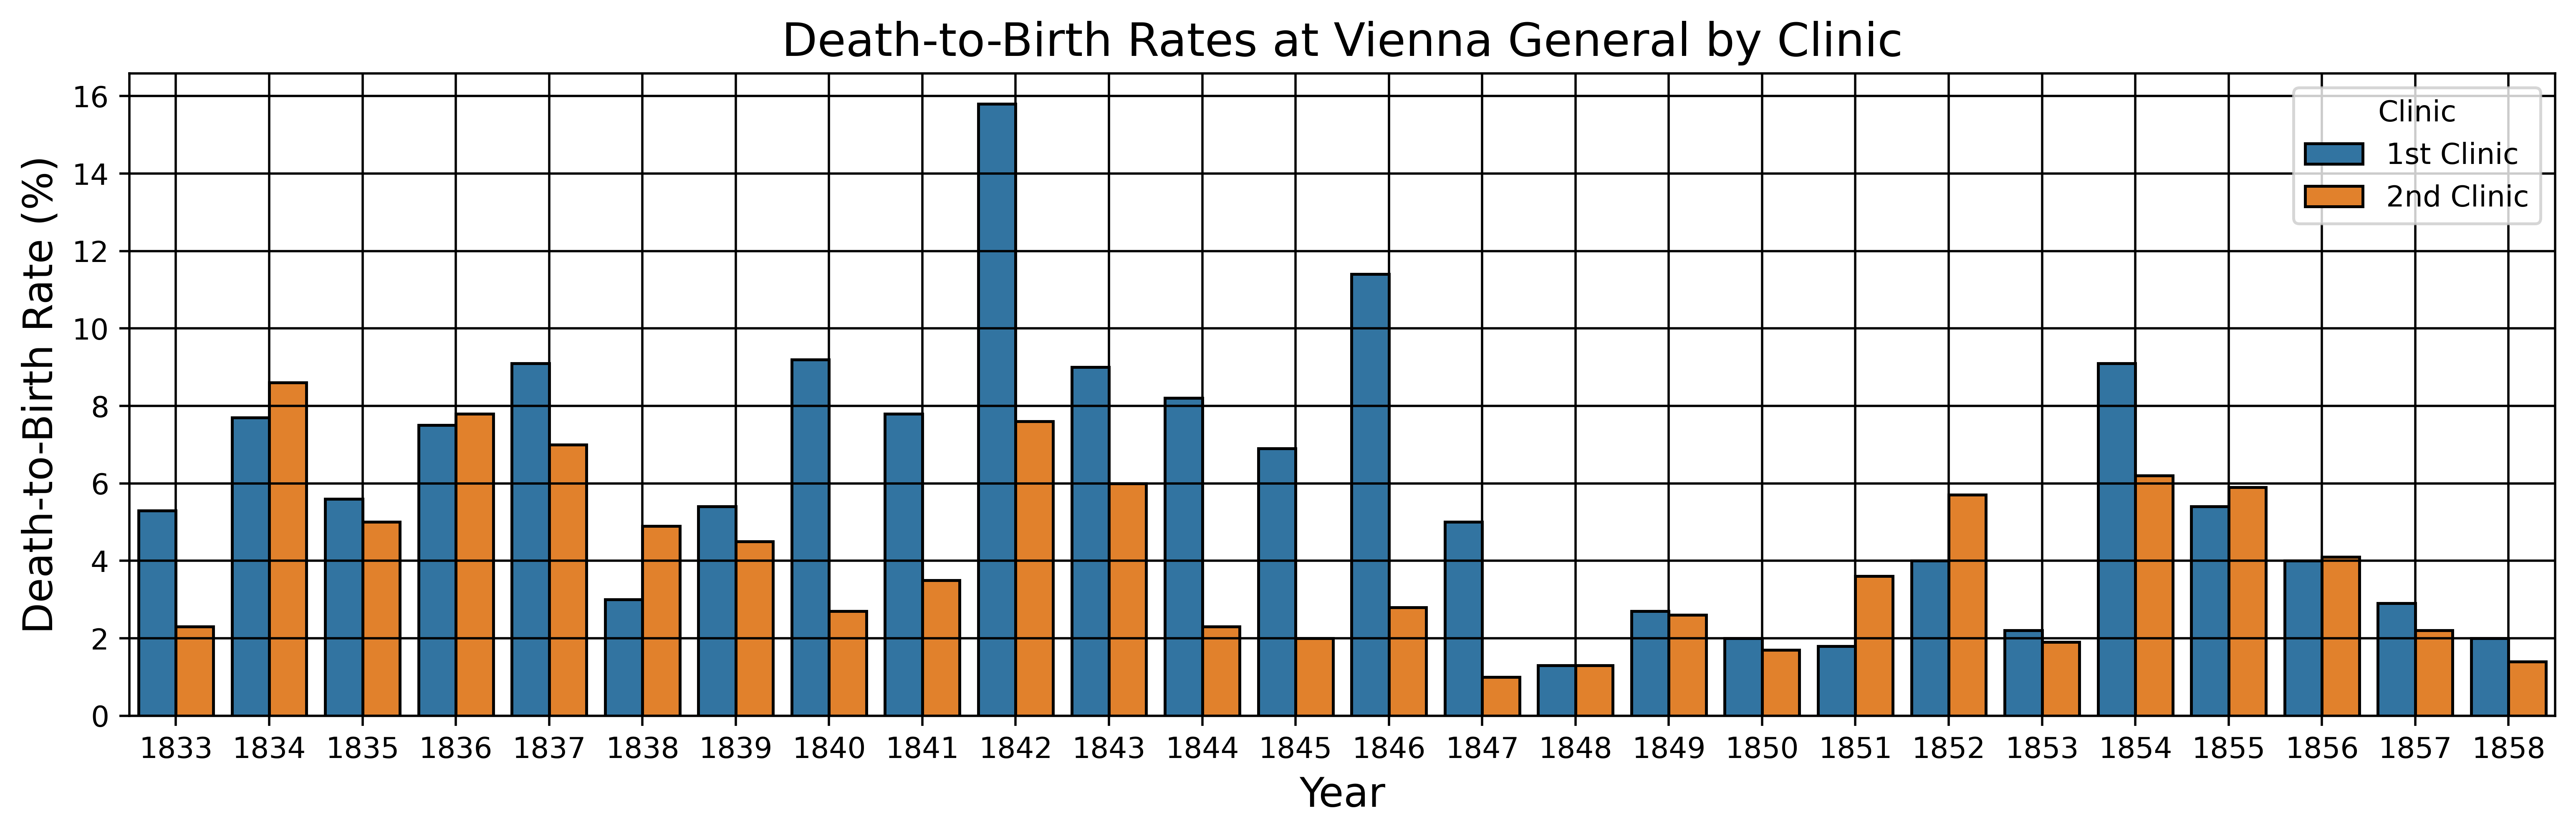

In [17]:
# Bar chart of death-to-birth ratios at Vienna General
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data in bar chart
sns.barplot(data=rate_df, 
            x='Year', 
            y='Rate', 
            hue='Clinic', 
            edgecolor='black')

# Specify grid color
ax.grid(c='black')

# Y-label
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

# Add title
plt.title('Death-to-Birth Rates at Vienna General by Clinic', fontsize=16)

# Show plot
plt.show()

## Figure 5.2: Bar chart of death-to-birth rates without grid

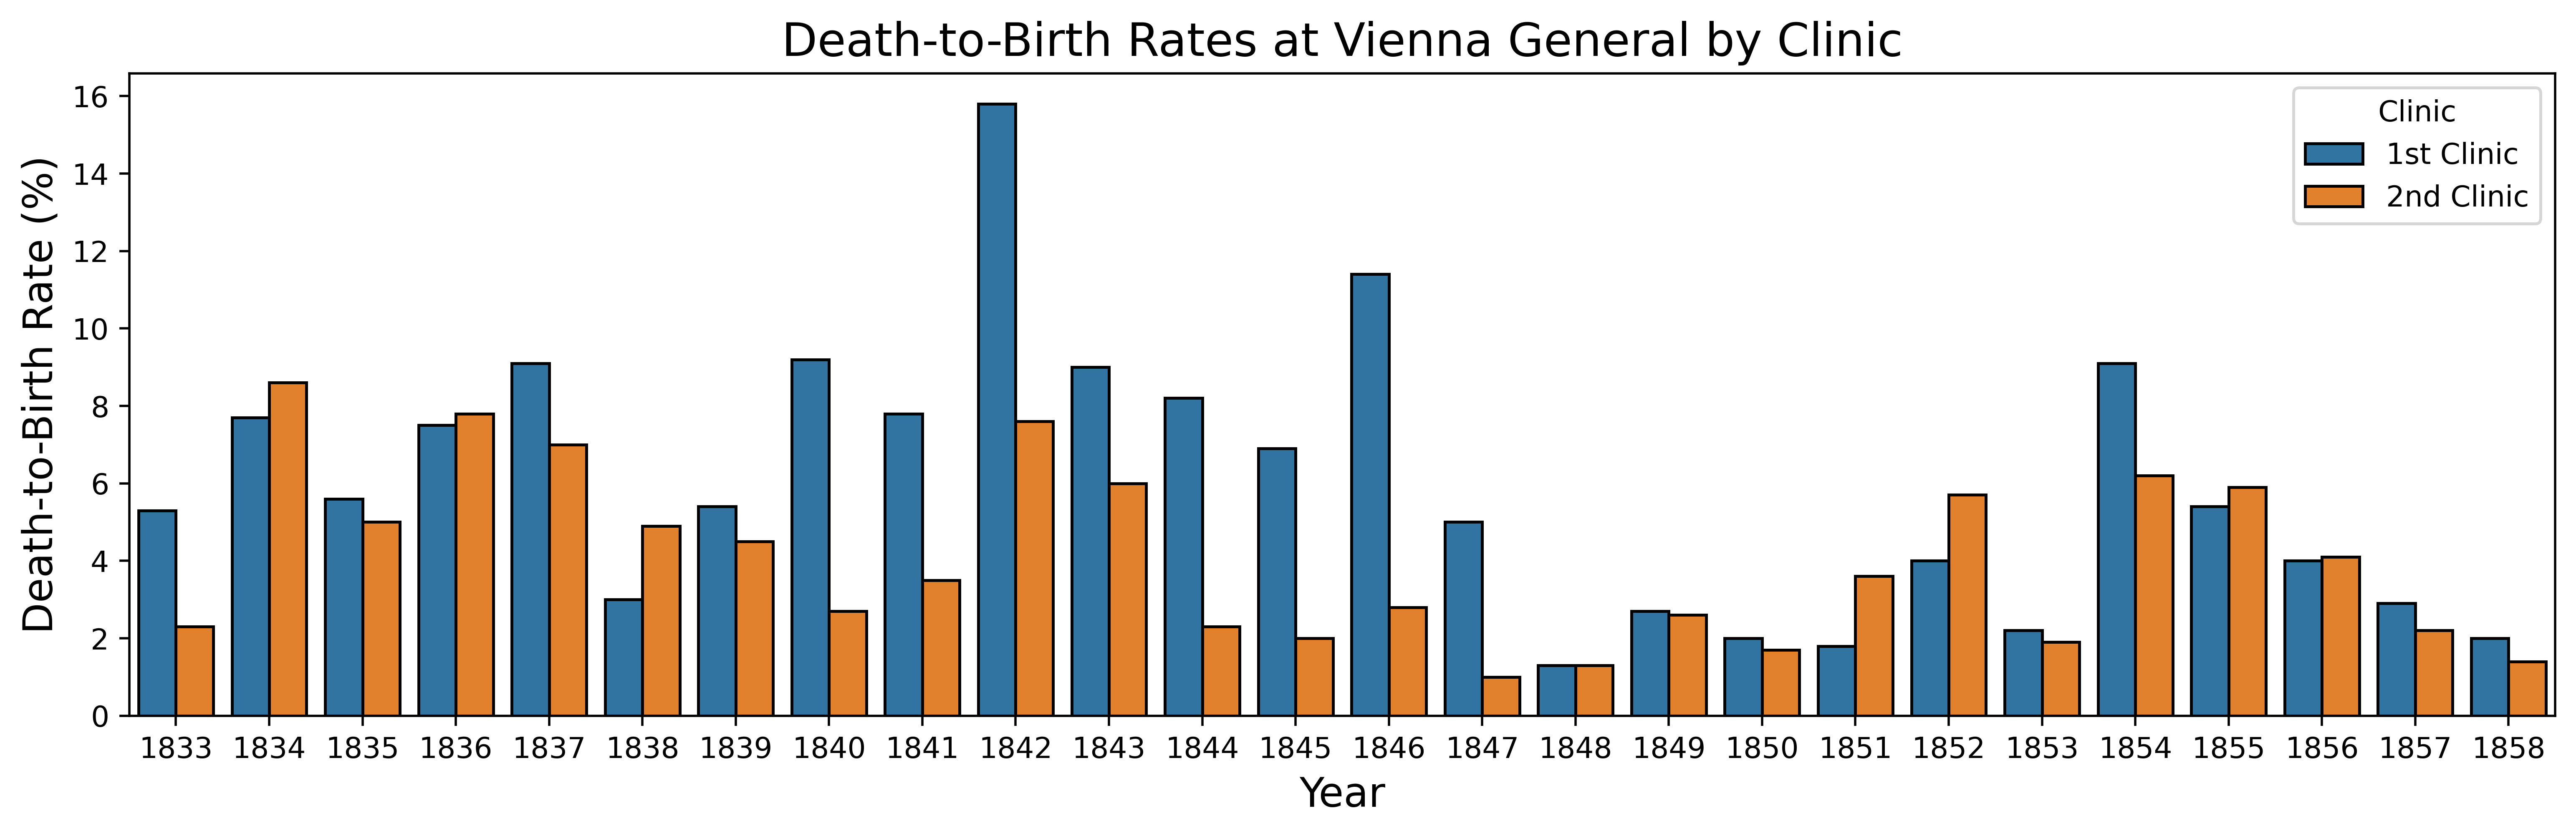

In [18]:
# Bar chart of death-to-birth ratios at Vienna General with no grid
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data in bar chart
sns.barplot(data=rate_df, 
            x='Year', 
            y='Rate', 
            hue='Clinic', 
            edgecolor='black')

# Y-label
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

# Add title
plt.title('Death-to-Birth Rates at Vienna General by Clinic', fontsize=16)

# Show plot
plt.show()

## Figure 5.3: Time series of death-to-birth rates by clinic

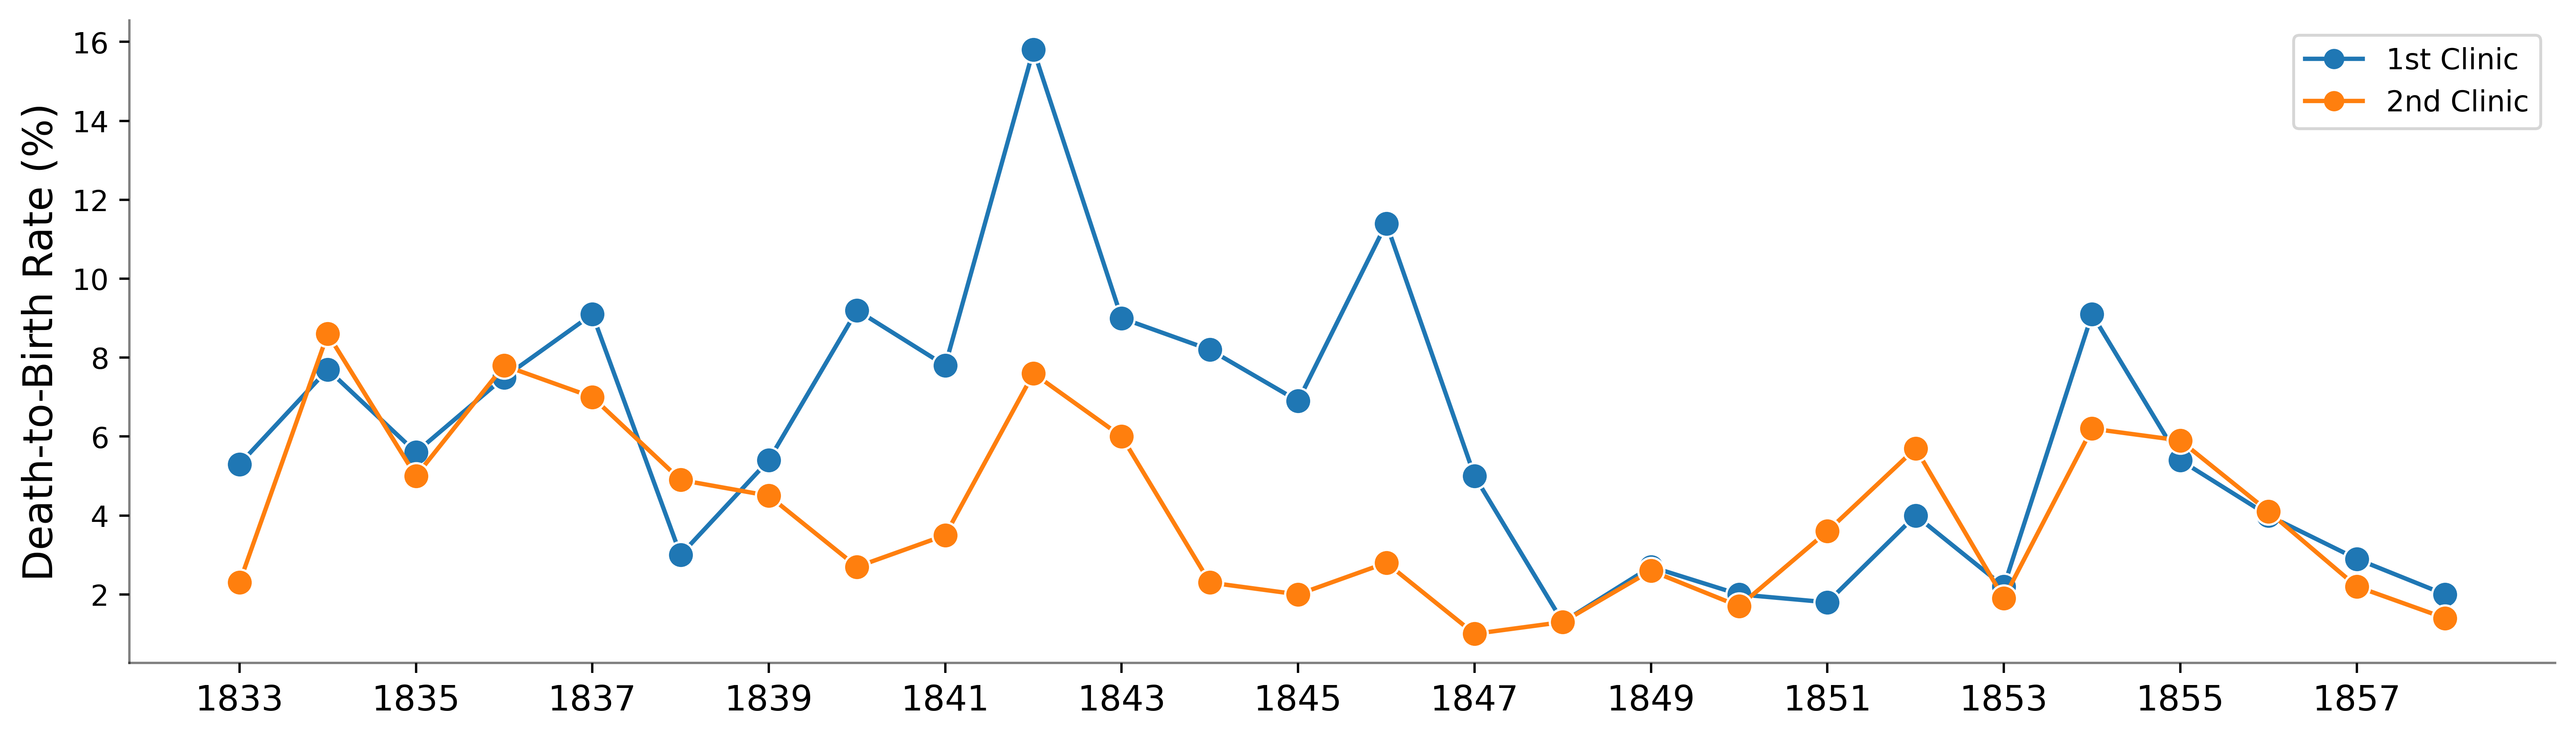

In [19]:
# Specify labels
labels = rate_df['Year']

# Bar chart of death-to-birth ratios at Vienna General with no grid
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data in bar chart
sns.lineplot(data=rate_df, 
             x='Year', 
             y='Rate', 
             hue='Clinic',
             marker='o',
             markersize=9)

# Specify y-label
ax.set_ylabel('Death-to-Birth Rate (%)', fontsize=14)

# Remove x-label
ax.set_xlabel('')


# Remove upper and right spine
sns.despine()

# Reduce visbility of left and bottom spine
ax.spines[['left','bottom']].set_alpha(0.5)

# X-Axis Formatting
tick_interval = 2
tick_positions = np.arange(0, len(labels)/2, tick_interval)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], 
                   rotation=0, 
                   ha='center', 
                   fontsize=12)

# Format legend
legend = ax.legend(title=None)

# Display marker in addition to line in legend
for lh in legend.legend_handles:
    lh.set_marker('o')

# Show plot
plt.show()

## Figure 5.4: Bar chart and time series 

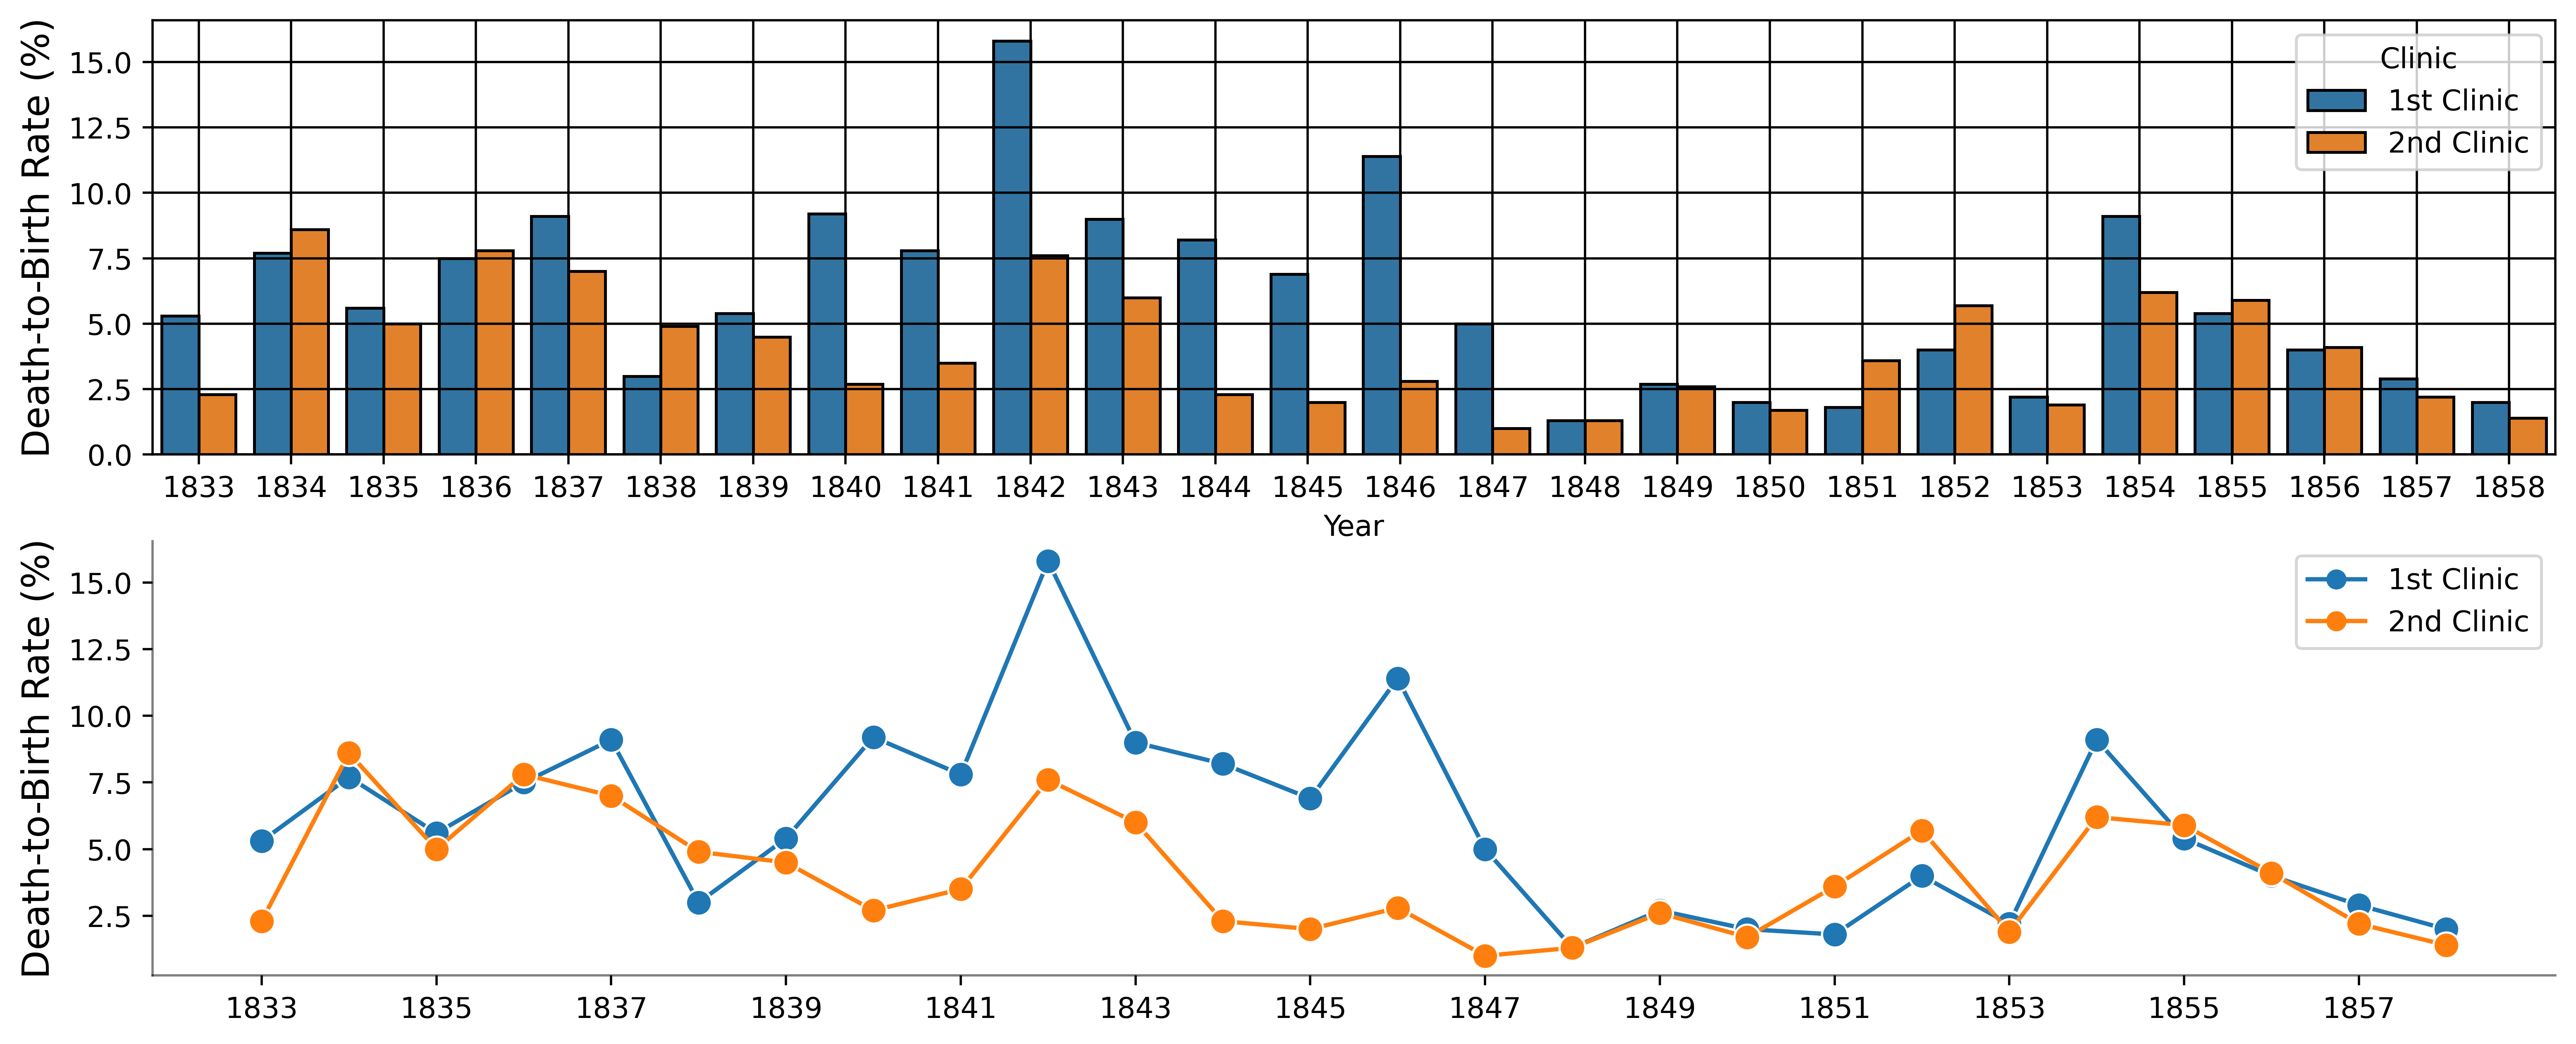

In [20]:
# Time series of death-to-birth ratios at Vienna General
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6), dpi=500)

# Plot data in a bar chart
sns.barplot(data=rate_df, 
            x='Year', 
            y='Rate', 
            hue='Clinic', 
            edgecolor='black', ax=ax[0])

# Specify grid color
ax[0].grid(c='black')

# Plot first clinic data as a time series
sns.lineplot(data=rate_df, 
             x='Year', 
             y='Rate',
             hue='Clinic',
             marker='o', 
             markersize=9, 
             ax=ax[1])

# Despine time series
sns.despine(ax=ax[1])
# Specify spine alphas
ax[1].spines[['left','bottom']].set_alpha(0.5)
ax[1].set_xlabel('')

# plt.title('Death-to-Birth Ratios at Vienna General by Year', fontsize=14)
plt.xticks(ticks=np.arange(0, 26, 2))
ax[0].set_ylabel('Death-to-Birth Rate (%)', fontsize=13)
ax[1].set_ylabel('Death-to-Birth Rate (%)', fontsize=13)

# Apply the tick configuration to the first subplot
ax[0].set_xticks(np.arange(0, 26, 1))

# Remove title from time series (ts) legend
ts_legend = ax[1].legend(title=False)

# Display marker in addition to line in legend
for lh in ts_legend.legend_handles:
    lh.set_marker('o')

# Show plot
plt.show()